<a href="https://colab.research.google.com/github/Deeks900/GenAIBootcamp/blob/main/exercise_adhoc_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use PyTorch autograd and gradient descent for linear regression
* create a synthetic dataset with 100 data points

In [1]:
import torch as pt
pt.manual_seed(0)
from matplotlib import pyplot as plt

In [2]:
# prompt: generate a tensor X of linspace between -5 aND 5 and a tensor y being 5*x + 3 + gaussian noise of sigma 0.5

import torch as pt
# ## Use PyTorch autograd and gradient descent for linear regression
# * create a synthetic dataset with 100 data points
pt.manual_seed(0)

X = pt.linspace(-5, 5, 100)
y = 5 * X + 3 + pt.randn(100) * 1.5


## Render a scatter plot of the sample data
* remember to import `matplotlib.pyplot as plt` and set `%matplotlib inline`

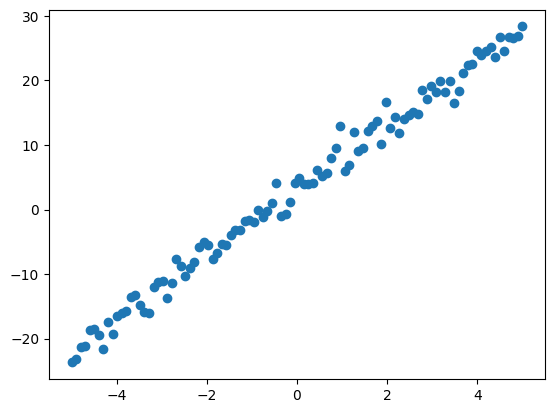

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X, y)

## Initialize the model parameter
* **hint:** don't forget to set `requires_grad = True`

In [3]:
weight = pt.tensor([0.0], requires_grad=True)
bias = pt.tensor([0.0], requires_grad=True)

## Implement a `forward` method that returns the predicted values

In [7]:
def forward(X):
    return weight * X + bias

## Implement a `loss` method that returns the mean squared error
* **hint:** use the `pt.mean` method

In [5]:
def loss(y_pred, y):
    return pt.mean((y_pred - y) ** 2)

## Training loop

In [8]:
EPOCHS = 1000
LEARNING_RATE = 0.01
for epoch in range(EPOCHS):
    y_pred = forward(X)  #1. calculate predictions
    l = loss(y_pred, y)  #2. calculate loss
    print(f"Epoch {epoch} loss: {l.item()}, weight: {weight.item()}, bias: {bias.item()}")
    l.backward()  #3. do backward
    with pt.no_grad():  #4. do update (later we will use optimizers)
      weight -= LEARNING_RATE * weight.grad
      bias -= LEARNING_RATE * bias.grad
    weight.grad = None  # 5. set gradients to zero
    bias.grad = None

Epoch 0 loss: 224.20675659179688, weight: 0.0, bias: 0.0
Epoch 1 loss: 157.71388244628906, weight: 0.8501002788543701, bias: 0.061114225536584854
Epoch 2 loss: 111.81021118164062, weight: 1.5556550025939941, bias: 0.12100616842508316
Epoch 3 loss: 80.09332275390625, weight: 2.1412415504455566, bias: 0.17970028519630432
Epoch 4 loss: 58.152706146240234, weight: 2.627258777618408, bias: 0.23722051084041595
Epoch 5 loss: 42.950103759765625, weight: 3.0306365489959717, bias: 0.29359033703804016
Epoch 6 loss: 32.392452239990234, weight: 3.365426540374756, bias: 0.34883275628089905
Epoch 7 loss: 25.037832260131836, weight: 3.6432909965515137, bias: 0.4029703140258789
Epoch 8 loss: 19.89284896850586, weight: 3.8739092350006104, bias: 0.4560251235961914
Epoch 9 loss: 16.273090362548828, weight: 4.065314292907715, bias: 0.5080188512802124
Epoch 10 loss: 13.706955909729004, weight: 4.224174499511719, bias: 0.5589727163314819
Epoch 11 loss: 11.869497299194336, weight: 4.356022834777832, bias: 0.6

\## Render a plot of the sample data with a line based on your model parameter
* use `detach().numpy()` on the tensor generated by your model to render it
* **hint:** reuse your `forward` function to generate the values for the line plot


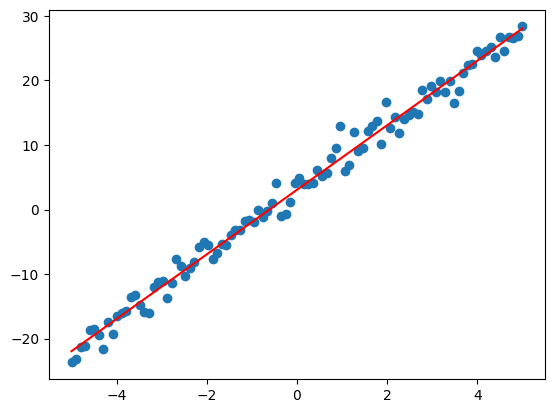

In [9]:
# prompt: Render a plot of the sample data with a line based on your model parameter

import matplotlib.pyplot as plt
plt.scatter(X, y)
X_line = pt.linspace(-5, 5, 100)
y_line = forward(X_line).detach().numpy()
plt.plot(X_line.numpy(), y_line, color='r')


# Exercise: Try to do the same but with the following equation:

Y = 2*X^2 + 3 * X - 4  

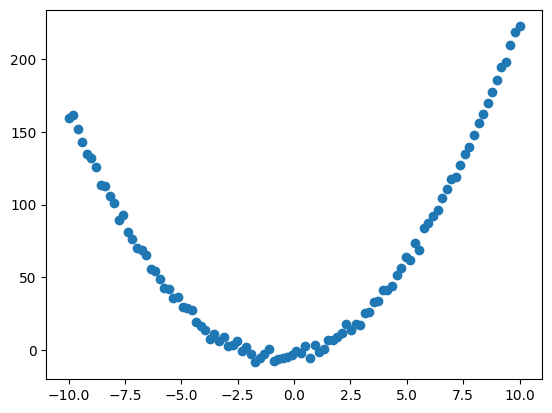

In [ ]:
X = pt.linspace(-10, 10, 100)
y = 2 * X**2 + 3*X + -4 + pt.randn(100) * 3
plt.scatter(X, y)

In [ ]:
weight_1 = pt.tensor([0.0], requires_grad=True)
weight_2 = pt.tensor([0.0], requires_grad=True)
bias = pt.tensor([0.0], requires_grad=True)
print("Initial weight_1:", weight_1.item())

Initial weight_1: 0.0


In [ ]:
def forward(X):
    return weight_2 * X ** 2 + weight_1 * X + bias

In [ ]:
def loss(y_pred, y):
    return pt.mean(pt.abs(y_pred - y))

In [ ]:
EPOCHS = 10
LEARNING_RATE = 0.001
for epoch in range(EPOCHS):
    y_pred = forward(X)  #1. calculate predictions
    #print(y_pred)
    l = loss(y_pred, y)  #2. calculate loss
    print(f"Epoch {epoch} loss: {l.item()}, weight_1: {weight_1.item()},weight_2: {weight_2.item()}, bias: {bias.item()}")
    l.backward()  #3. do backward
    with pt.no_grad():  #4. do update (later we will use optimizers)
      weight_1 -= LEARNING_RATE * weight_1.grad
      weight_2 -= LEARNING_RATE * weight_2.grad
      bias -= LEARNING_RATE * bias.grad
    weight_1.grad = None  # 5. set gradients to zero
    weight_2.grad = None
    bias.grad = None

Epoch 0 loss: 2.658719778060913, weight_1: 3.078040361404419,weight_2: 1.9552288055419922, bias: -0.5798230171203613
Epoch 1 loss: 2.6574959754943848, weight_1: 3.0778403282165527,weight_2: 1.954195261001587, bias: -0.5801630020141602
Epoch 2 loss: 2.6580185890197754, weight_1: 3.0776402950286865,weight_2: 1.9531617164611816, bias: -0.580502986907959
Epoch 3 loss: 2.6581063270568848, weight_1: 3.077779769897461,weight_2: 1.9550082683563232, bias: -0.5808029770851135
Epoch 4 loss: 2.6568825244903564, weight_1: 3.0775797367095947,weight_2: 1.953974723815918, bias: -0.5811429619789124
Epoch 5 loss: 2.6583337783813477, weight_1: 3.0773797035217285,weight_2: 1.9529411792755127, bias: -0.5814829468727112
Epoch 6 loss: 2.658703088760376, weight_1: 3.0776383876800537,weight_2: 1.9554980993270874, bias: -0.581762969493866
Epoch 7 loss: 2.6587085723876953, weight_1: 3.0776262283325195,weight_2: 1.9526996612548828, bias: -0.5821229815483093
Epoch 8 loss: 2.6578402519226074, weight_1: 3.0778849124

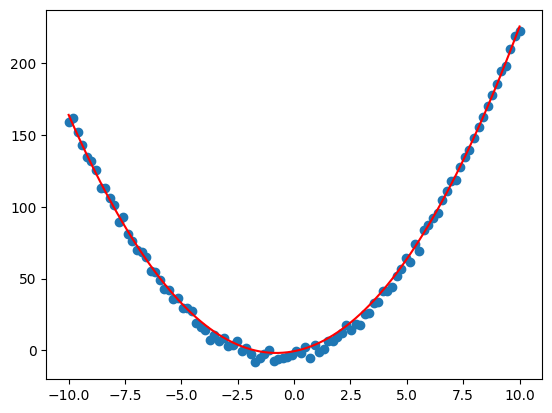

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
X_line = pt.linspace(-10, 10, 100)
y_line = forward(X_line).detach().numpy()
plt.plot(X_line.numpy(), y_line, color='r')